<a href="https://colab.research.google.com/github/kidusfmariam/Animation/blob/main/Randomized%20SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Randomized SVD & Robust PCA

## Randomized SVD

While the SVD is the optimal method to decompose a matrix so as to obtain a lower rank matrix, doing so can be computationally expensive on larger matrices. Thus we need a different algorithm that can do what the SVD does, but in a way that is computationally efficient. That algorithm is known as randomized SVD.

For any given $m \times n$ matrix $A$ if we impose a target rank $k$ where $k < \text{min}\{m,n\}$, it's randomized SVD can be broken down into three steps:
1. Generate a random Gaussian matrix $\Omega$ with size of $n \times k$
2. Compute a new $m \times k$ matrix $Y$
3. Apply the $QR$ decomposition to $Y$

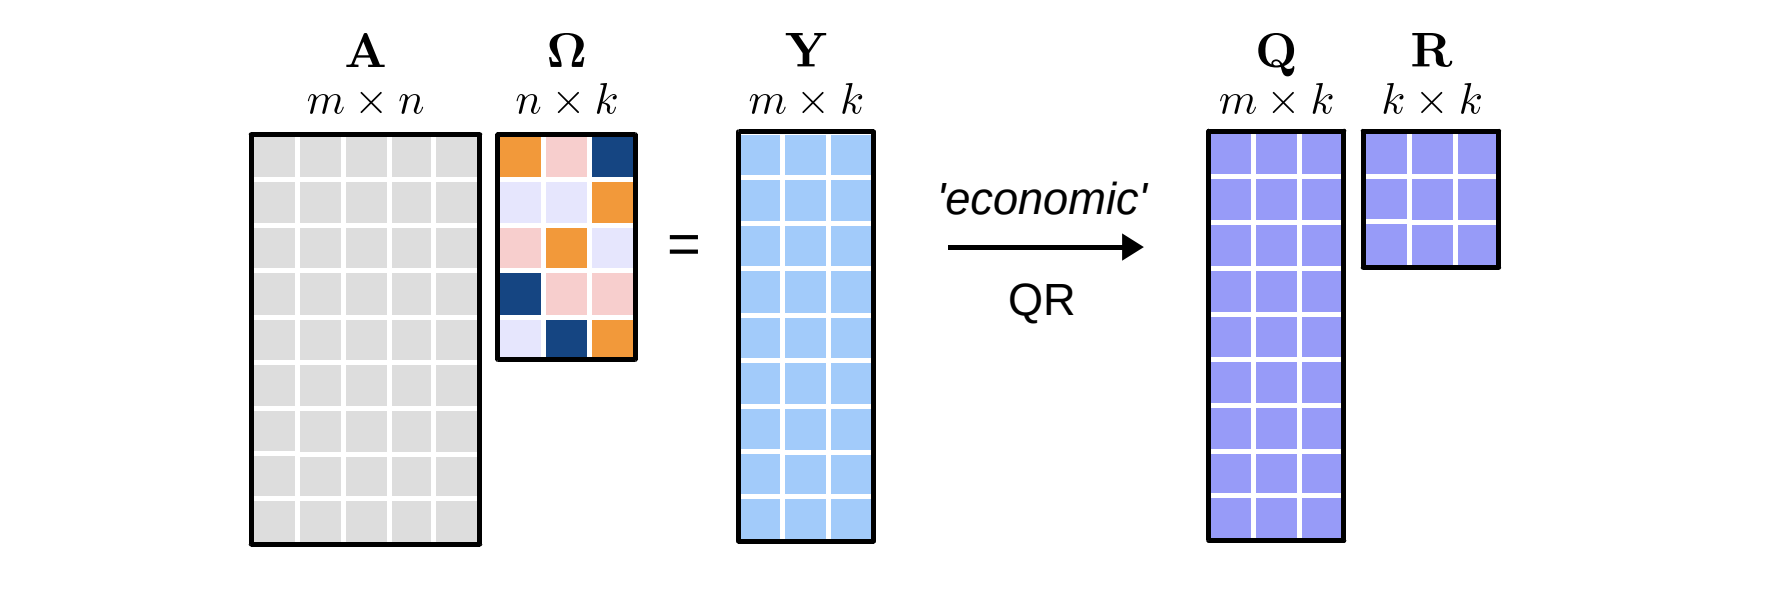

4. Derive a $k \times n$ matrix $B$ by multiplying $Q^T$ with $A$, $B=Q^TA$
5. Compute the SVD of $B$, here $B$ is a much smaller matrix and therefore is easier to work with. The singualr value $\Sigma$ and right singular vector $V$ of $B$ are the same with that of $A$. We can obtain the left singular vector $U$ of $A$ by multiplying the left singular vector of $B$ with $Q$.
$$U_A=QU_B$$


### Python Implementation

In [ ]:
import numpy as np
def randomized_svd(A, Omega):
  Y=A@Omega
  Q, _=np.linalg.qr(Y)
  B=Q.T@A
  u_b, s, v=np.linalg.svd(B, full_matrices=False)
  u_a=Omega@u_b
  return u_a, s, v

In [ ]:
# normal svd
A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])
u, s, v = np.linalg.svd(A, full_matrices=False)
print('Left singular vectors:')
print(u)
print()
print('Singular values:')
print(s)
print()
print('Right singular vectors:')
print(v)

Left singular vectors:
[[-0.37421754  0.28475648 -0.88253894]
 [-0.56470638 -0.82485997 -0.02669705]
 [-0.7355732   0.48838486  0.46948087]]

Singular values:
[9.34265841 3.24497827 1.08850813]

Right singular vectors:
[[-0.57847229 -0.61642675 -0.53421706]
 [-0.73171177  0.10269066  0.67383419]
 [ 0.36051032 -0.78068732  0.51045041]]


In [ ]:
A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])
rank = 2
Omega = np.random.randn(A.shape[1], rank)
u, s, v = randomized_svd(A, Omega)
print('Left singular vectors:')
print(u)
print()
print('Singular values:')
print(s)
print()
print('Right singular vectors:')
print(v)
print()


Left singular vectors:
[[-1.46343324 -0.41723271]
 [-0.92840966 -0.2921429 ]
 [-1.36447371  0.0653745 ]]

Singular values:
[9.33896635 3.17904152]

Right singular vectors:
[[ 0.58134047  0.61367188  0.53427529]
 [-0.70226589  0.04680005  0.71037481]]



 The singular values of the matrix $A$ are 9.3427, 3.2450, and 1.0885. In this case, randomized SVD has the first two singular values as 9.3422 and 3.0204. We can see that the first singular values computed by these two SVD algorithms are extremely close. However, the second singular value of randomized SVD has a slight bias. We can improve this result by using Randomized SVD with power iteration.

## Randomized SVD with Power Iteration

In this algorithm we compute the $m \times k$ matrix $Y$ iteratively and then derive the $m \times k$ matrix $Q$ through $QR$ decomposition.

### Python Implementation

In [ ]:
def power_iteration(A, Omega, power_iter = 3):
    Y = A @ Omega
    for q in range(power_iter):
        Y = A @ (A.T @ Y)
    Q, _ = np.linalg.qr(Y)
    return Q

def rsvd(A, Omega):
    Q = power_iteration(A, Omega)
    B = Q.T @ A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde
    return u, s, v

In [ ]:
A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])
rank = 2
Omega = np.random.randn(A.shape[1], rank)
u, s, v = rsvd(A, Omega)
print('Left singular vectors:')
print(u)
print()
print('Singular values:')
print(s)
print()
print('Right singular vectors:')
print(v)
print()

Left singular vectors:
[[ 0.37421739  0.2842721 ]
 [ 0.56470637 -0.8248745 ]
 [ 0.73557328  0.48864244]]

Singular values:
[9.34265841 3.24497784]

Right singular vectors:
[[ 0.5784723   0.61642674  0.53421707]
 [-0.73164539  0.10254694  0.67392814]]



Our second singular value now is almost identical to the original one.

## Applications: Image Compression

-  **Using SVD directly**

In [ ]:
import numpy as np
import imageio

image = imageio.imread('https://images.unsplash.com/photo-1721670472474-2f5e2fa80fd0?q=80&w=1580&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
A = image[:, :, 1]
%time u, s, v = np.linalg.svd(A, full_matrices = 0)

<ipython-input-25-50e79645f415>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('https://images.unsplash.com/photo-1721670472474-2f5e2fa80fd0?q=80&w=1580&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')


CPU times: user 8.85 s, sys: 3.27 s, total: 12.1 s
Wall time: 7.79 s


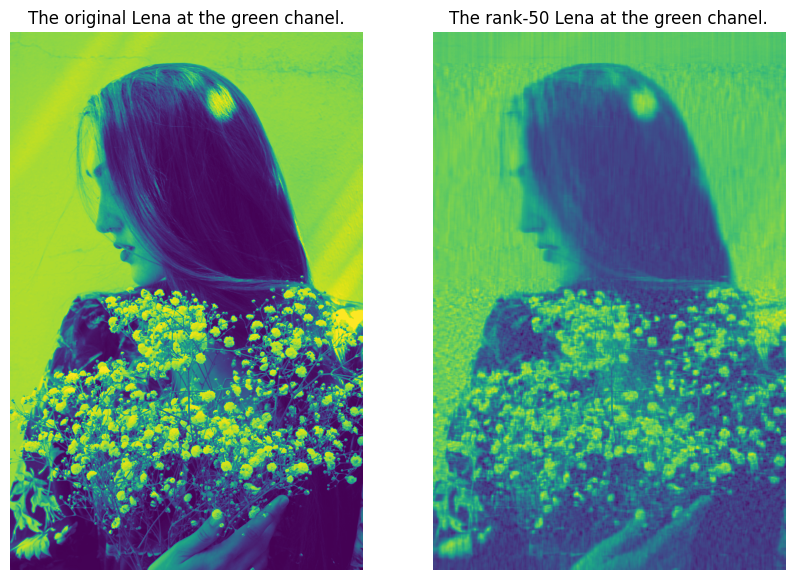

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('The original Lena at the green chanel.')
plt.axis('off')

plt.subplot(1, 2, 2)
rank = 50
plt.imshow(u[:, : rank] @ np.diag(s[: rank]) @ v[: rank, :])
plt.title('The rank-50 Lena at the green chanel.')
plt.axis('off')
plt.show()

CPU times: user 439 ms, sys: 192 ms, total: 632 ms
Wall time: 599 ms


(-0.5, 1579.5, 2412.5, -0.5)

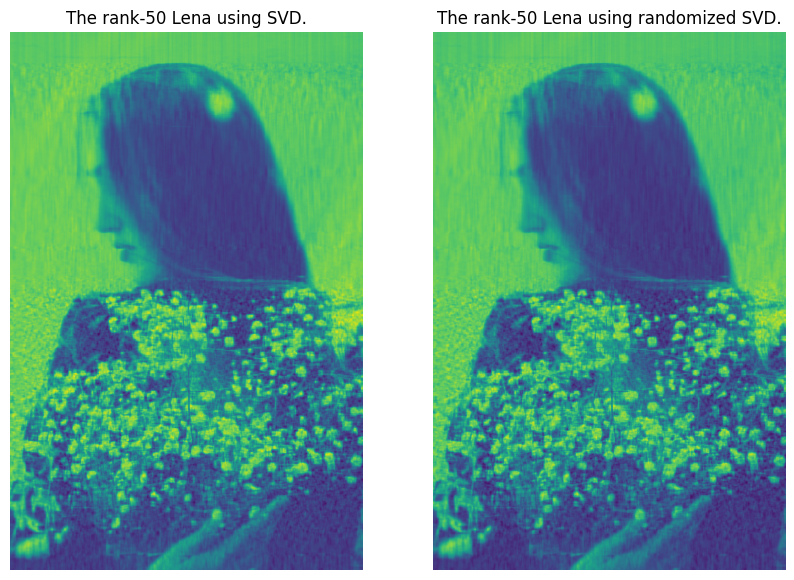

In [ ]:
plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(u[:, : rank] @ np.diag(s[: rank]) @ v[: rank, :])
plt.title('The rank-50 Lena using SVD.')
plt.axis('off')

rank = 50
Omega = np.random.randn(A.shape[1], rank)
%time u, s, v = rsvd(A, Omega)

plt.subplot(1, 2, 2)
plt.imshow(u[:, : rank] @ np.diag(s[: rank]) @ v[: rank, :])
plt.title('The rank-50 Lena using randomized SVD.')
plt.axis('off')

In conclusion, we get the same output for minimal time.